In [252]:
import pandas as pd
import numpy as np
import seaborn as sns
from os import path
import matplotlib.pyplot as plt
%matplotlib inline

In [253]:
data_path ='data'

In [254]:
df = pd.read_csv(path.join(data_path, 'federalreporter_20200223.csv'), delimiter = '|', header=None,
                names =['Project Number', 'Title', 'Agency', 'PI', 'Univ','Country', 'Fiscal Year', 
                        'Total Cost','Start Year','End Year' ],thousands=',')
df.shape

(8039, 10)

In [255]:
df.head()

,Project Number,Title,Agency,PI,Univ,Country,Fiscal Year,Total Cost,Start Year,End Year
0,1717290,RI: SMALL: MODERN MACHINE LEARNING ALGORITHMS ...,NSF,"AGARWAL, SHIVANI",UNIVERSITY OF PENNSYLVANIA,UNITED STATES,2017,"$445,473",01-Sep-2017,31-Aug-2020
1,1R01LM012734-01,MECHANISTIC MACHINE LEARNING,NLM,"ALBERS, DAVID J.",COLUMBIA UNIVERSITY HEALTH SCIENCES,UNITED STATES,2017,"$698,661",20-Sep-2017,31-Aug-2020
2,1ZIALM010004-02,IMAGE ANALYSIS AND MACHINE LEARNING FOR PULMON...,NLM,"ANTANI, SAMEER",NATIONAL INSTITUTES OF HEALTH,UNITED STATES,2017,"$303,476",NaN,NaN
3,261201700515P-0-0-1,IGF::OT::IGF MACHINE LEARNING METHODS TO IDENT...,NCI,"BANERJEE, MOUSUMI",NaN,UNITED STATES,2017,"$24,500",15-Sep-2017,14-Sep-2018
4,5R21MH110758-02,MACHINE LEARNING AND PERSONALIZED PROGNOSIS FO...,NIMH,"BEEVERS, CHRISTOPHER G",UNIVERSITY OF TEXAS AUSTIN,UNITED STATES,2017,"$195,625",01-Jul-2016,31-May-2019


## preprocess the data

### 1 change the time formate

In [256]:
from datetime import datetime

s1 = "20-Sep-2017"
d1 = datetime.strptime(s1, '%d-%b-%Y')
d2 = datetime.strptime('31-Aug-2020', '%d-%b-%Y')
delta = d2-d1
delta.days/365

d1.strftime('%Y-%m-%d')

'2017-09-20'

In [257]:
df['Start Year'] = pd.to_datetime(df['Start Year'])
df['End Year'] = pd.to_datetime(df['End Year'])

In [258]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8039 entries, 0 to 8038
Data columns (total 10 columns):
Project Number    8039 non-null object
Title             8039 non-null object
Agency            8039 non-null object
PI                8039 non-null object
Univ              8038 non-null object
Country           8037 non-null object
Fiscal Year       8039 non-null int64
Total Cost        7966 non-null object
Start Year        7358 non-null datetime64[ns]
End Year          7393 non-null datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(7)
memory usage: 628.2+ KB


In [259]:
(df['End Year'] - df['Start Year']).astype('timedelta64[h]')

0       26280.0
1       25824.0
2           NaN
3        8736.0
4       25536.0
         ...   
8034    26280.0
8035    43416.0
8036    43056.0
8037    33960.0
8038    26280.0
Length: 8039, dtype: float64

In [260]:
df['Delta_years'] = round((df['End Year'] - df['Start Year']).astype('timedelta64[D]')/365)
df.head()

,Project Number,Title,Agency,PI,Univ,Country,Fiscal Year,Total Cost,Start Year,End Year,Delta_years
0,1717290,RI: SMALL: MODERN MACHINE LEARNING ALGORITHMS ...,NSF,"AGARWAL, SHIVANI",UNIVERSITY OF PENNSYLVANIA,UNITED STATES,2017,"$445,473",2017-09-01,2020-08-31,3.0
1,1R01LM012734-01,MECHANISTIC MACHINE LEARNING,NLM,"ALBERS, DAVID J.",COLUMBIA UNIVERSITY HEALTH SCIENCES,UNITED STATES,2017,"$698,661",2017-09-20,2020-08-31,3.0
2,1ZIALM010004-02,IMAGE ANALYSIS AND MACHINE LEARNING FOR PULMON...,NLM,"ANTANI, SAMEER",NATIONAL INSTITUTES OF HEALTH,UNITED STATES,2017,"$303,476",NaT,NaT,NaN
3,261201700515P-0-0-1,IGF::OT::IGF MACHINE LEARNING METHODS TO IDENT...,NCI,"BANERJEE, MOUSUMI",NaN,UNITED STATES,2017,"$24,500",2017-09-15,2018-09-14,1.0
4,5R21MH110758-02,MACHINE LEARNING AND PERSONALIZED PROGNOSIS FO...,NIMH,"BEEVERS, CHRISTOPHER G",UNIVERSITY OF TEXAS AUSTIN,UNITED STATES,2017,"$195,625",2016-07-01,2019-05-31,3.0


In [261]:
df['Fiscal Year'].unique()

array([2017, 2014, 2016, 2015, 2018])

In [262]:
def correct_years(x):
    if x['Delta_years']>5:
        f = pd.to_datetime(x['Fiscal Year'],format='%Y')
        t = x['End Year']
        delta = round((t - f).days/365)
        x['Delta_years'] = delta
    return x
    
df = df.apply(correct_years, axis=1)

In [263]:
df[df['Delta_years']>5].head(10)

,Project Number,Title,Agency,PI,Univ,Country,Fiscal Year,Total Cost,Start Year,End Year,Delta_years
353,3U24CA224370-01S1,MACHINE LEARNING MODEL VALIDATION FOR AD/ADRD,NCI,"OPREA, TUDOR I",UNIVERSITY OF NEW MEXICO HEALTH SCIS CTR,UNITED STATES,2018,"$378,750",2018-01-03,2023-12-31,6.0
443,2P01AG005842-30,IMPROVING HEALTH OUTCOMES FOR AN AGING POPULATION,NIA,"BAICKER, KATHERINE",NATIONAL BUREAU OF ECONOMIC RESEARCH,UNITED STATES,2017,"$1,755,747",1997-02-01,2023-06-30,6.0
464,2R24AI072073-11,IMMGEN: GENE EXPRESSION AND REGULATION IN IMMU...,NIAID,"BENOIST, CHRISTOPHE O.",HARVARD UNIVERSITY,UNITED STATES,2017,"$1,727,457",2007-09-18,2022-08-31,6.0
803,1U24HL138998-01,"DATA, MODELING,AND COORDINATION CENTER FOR PRE...",NHLBI,"IVANOVA, ANASTASIA",UNIVERSITY OF NORTH CAROLINA CHAPEL HILL,UNITED STATES,2017,"$991,019",2017-09-23,2023-06-30,6.0
818,1U24DK116204-01,ILLUMINATING FUNCTION OF THE UNDERSTUDIED DRUG...,NIDDK,"JOHNSON, GARY L.",UNIVERSITY OF NORTH CAROLINA CHAPEL HILL,UNITED STATES,2017,"$2,308,193",2017-09-15,2023-08-31,7.0
1778,1U54HL127365-01,PHARMACO RESPONSE SIGNATURES AND DISEASE MECHA...,NHLBI,"SORGER, PETER KARL",HARVARD UNIVERSITY,UNITED STATES,2014,"$2,145,458",2014-09-10,2020-06-30,6.0
1798,1U54NS091046-01,NEURON AND GLIAL CELLULAR SIGNATURES FROM NORM...,NINDS,"THOMPSON, LESLIE MICHELS",UNIVERSITY OF CALIFORNIA IRVINE,UNITED STATES,2014,"$1,334,000",2014-09-30,2020-06-30,6.0
1840,1412958,AF: LARGE: THEORY OF COMPUTATION - PUSHING THE...,NSF,"WIGDERSON, AVI",INSTITUTE FOR ADVANCED STUDY,UNITED STATES,2014,"$1,590,816",2014-09-01,2020-08-31,7.0
1882,2R01AA018673-06A1,IMPLEMENTATION OF TECHNOLOGY-BASED EVALUATION ...,NIAAA,"ATKINS, DAVID CHARLES",UNIVERSITY OF WASHINGTON,UNITED STATES,2016,"$647,176",2010-09-01,2021-08-31,6.0
2172,2T90DA022762-11,INTERDISCIPLINARY TRAINING IN COMPUTATIONAL NE...,NIDA,"KASS, ROBERT E",CARNEGIE MELLON UNIVERSITY,UNITED STATES,2016,"$187,448",2006-09-30,2021-08-31,6.0


In [264]:
df["Total Cost"] = df["Total Cost"].str.replace("$","")
df["Total Cost"] = df["Total Cost"].str.replace(",","").astype(float)
df.head()

,Project Number,Title,Agency,PI,Univ,Country,Fiscal Year,Total Cost,Start Year,End Year,Delta_years
0,1717290,RI: SMALL: MODERN MACHINE LEARNING ALGORITHMS ...,NSF,"AGARWAL, SHIVANI",UNIVERSITY OF PENNSYLVANIA,UNITED STATES,2017,445473.0,2017-09-01,2020-08-31,3.0
1,1R01LM012734-01,MECHANISTIC MACHINE LEARNING,NLM,"ALBERS, DAVID J.",COLUMBIA UNIVERSITY HEALTH SCIENCES,UNITED STATES,2017,698661.0,2017-09-20,2020-08-31,3.0
2,1ZIALM010004-02,IMAGE ANALYSIS AND MACHINE LEARNING FOR PULMON...,NLM,"ANTANI, SAMEER",NATIONAL INSTITUTES OF HEALTH,UNITED STATES,2017,303476.0,NaT,NaT,NaN
3,261201700515P-0-0-1,IGF::OT::IGF MACHINE LEARNING METHODS TO IDENT...,NCI,"BANERJEE, MOUSUMI",NaN,UNITED STATES,2017,24500.0,2017-09-15,2018-09-14,1.0
4,5R21MH110758-02,MACHINE LEARNING AND PERSONALIZED PROGNOSIS FO...,NIMH,"BEEVERS, CHRISTOPHER G",UNIVERSITY OF TEXAS AUSTIN,UNITED STATES,2017,195625.0,2016-07-01,2019-05-31,3.0


In [265]:
#only select NIH
df_2018 = pd.read_csv(path.join(data_path, 'FedRePORTER_PRJ_C_FY2018.csv')) 
df_2018.shape

/Users/juan/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(93974, 24)

In [266]:
df_2018.head()

,PROJECT_ID,PROJECT_TERMS,PROJECT_TITLE,DEPARTMENT,AGENCY,IC_CENTER,PROJECT_NUMBER,PROJECT_START_DATE,PROJECT_END_DATE,CONTACT_PI_PROJECT_LEADER,...,ORGANIZATION_CITY,ORGANIZATION_STATE,ORGANIZATION_ZIP,ORGANIZATION_COUNTRY,BUDGET_START_DATE,BUDGET_END_DATE,CFDA_CODE,FY,FY_TOTAL_COST,FY_TOTAL_COST_SUB_PROJECTS
0,983089,Acute; Address; Adhesions; Adhesives; Applica...,IMPROVING DRUG SAFETY FOR PREGNANT WOMEN BY DE...,HHS,ALLCDC,NCBDD,2R44DD001127-02,9/30/2017,9/29/2019,"MARKHAM, GLEN",...,MIDLAND,MI,486415039,UNITED STATES,9/30/2017,9/29/2018,103.0,2018,499961.0,NaN
1,1005000,Area; Biological Assay; Brain; Cell physiolog...,LIGHT ADAPTATION AND CIRCADIAN MODULATION,HHS,NIH,NEI,5R01EY024567-06,9/1/2014,6/30/2019,"FIELD, GREGORY DARIN",...,DURHAM,NC,277054673,UNITED STATES,7/1/2018,6/30/2019,867.0,2018,397500.0,NaN
2,1005001,3-Dimensional; Ablation; Affect; Aggressive b...,EVALUATION OF IRAK4 AS A NOVEL THERAPEUTIC TAR...,HHS,NIH,NCI,1R21CA223112-01,12/7/2017,11/30/2019,"LIM, KIAN H",...,SAINT LOUIS,MO,631304862,UNITED STATES,12/7/2017,11/30/2018,395.0,2018,165844.0,NaN
3,1005002,Acids; Acute; Address; Amish; analog; base; B...,NOVEL TREATMENT OPTIONS FOR GLUTARIC ACIDURIA,HHS,NIH,NICHD,5R21HD088775-02,9/1/2017,8/31/2019,"HOUTEN, SANDER MICHEL",...,NEW YORK,NY,100296574,UNITED STATES,9/1/2018,8/31/2019,865.0,2018,169500.0,NaN
4,1005003,4D Imaging; Address; Anaphase; Bacteria; Bact...,ILLEGITIMATE RECOMBINATION BY DRUG RESISTANCE ...,HHS,NIH,NIGMS,5R01GM025326-38,7/1/1978,1/31/2020,"KLECKNER, NANCY E.",...,CAMBRIDGE,MA,021385319,UNITED STATES,2/1/2018,1/31/2019,859.0,2018,667755.0,NaN


In [267]:
df_2018.columns

Index(['PROJECT_ID', ' PROJECT_TERMS', ' PROJECT_TITLE', ' DEPARTMENT',
       ' AGENCY', ' IC_CENTER', ' PROJECT_NUMBER', ' PROJECT_START_DATE',
       ' PROJECT_END_DATE', ' CONTACT_PI_PROJECT_LEADER', ' OTHER_PIS',
       ' CONGRESSIONAL_DISTRICT', ' DUNS_NUMBER', ' ORGANIZATION_NAME',
       ' ORGANIZATION_CITY', ' ORGANIZATION_STATE', ' ORGANIZATION_ZIP',
       ' ORGANIZATION_COUNTRY', ' BUDGET_START_DATE', ' BUDGET_END_DATE',
       ' CFDA_CODE', ' FY', ' FY_TOTAL_COST', ' FY_TOTAL_COST_SUB_PROJECTS'],
      dtype='object')

In [268]:
df_2018.columns

Index(['PROJECT_ID', ' PROJECT_TERMS', ' PROJECT_TITLE', ' DEPARTMENT',
       ' AGENCY', ' IC_CENTER', ' PROJECT_NUMBER', ' PROJECT_START_DATE',
       ' PROJECT_END_DATE', ' CONTACT_PI_PROJECT_LEADER', ' OTHER_PIS',
       ' CONGRESSIONAL_DISTRICT', ' DUNS_NUMBER', ' ORGANIZATION_NAME',
       ' ORGANIZATION_CITY', ' ORGANIZATION_STATE', ' ORGANIZATION_ZIP',
       ' ORGANIZATION_COUNTRY', ' BUDGET_START_DATE', ' BUDGET_END_DATE',
       ' CFDA_CODE', ' FY', ' FY_TOTAL_COST', ' FY_TOTAL_COST_SUB_PROJECTS'],
      dtype='object')

In [269]:
nih_agencys = list(df_2018[df_2018[' AGENCY']=='NIH'][' IC_CENTER'].unique())
len(nih_agencys)

27

In [270]:
nih_agencys = nih_agencys + ['NCRR']
len(nih_agencys)

28

In [271]:
df = df[df['Agency'].isin(nih_agencys)]
df.shape

(4774, 11)

In [272]:
df.head()

,Project Number,Title,Agency,PI,Univ,Country,Fiscal Year,Total Cost,Start Year,End Year,Delta_years
1,1R01LM012734-01,MECHANISTIC MACHINE LEARNING,NLM,"ALBERS, DAVID J.",COLUMBIA UNIVERSITY HEALTH SCIENCES,UNITED STATES,2017,698661.0,2017-09-20,2020-08-31,3.0
2,1ZIALM010004-02,IMAGE ANALYSIS AND MACHINE LEARNING FOR PULMON...,NLM,"ANTANI, SAMEER",NATIONAL INSTITUTES OF HEALTH,UNITED STATES,2017,303476.0,NaT,NaT,NaN
3,261201700515P-0-0-1,IGF::OT::IGF MACHINE LEARNING METHODS TO IDENT...,NCI,"BANERJEE, MOUSUMI",NaN,UNITED STATES,2017,24500.0,2017-09-15,2018-09-14,1.0
4,5R21MH110758-02,MACHINE LEARNING AND PERSONALIZED PROGNOSIS FO...,NIMH,"BEEVERS, CHRISTOPHER G",UNIVERSITY OF TEXAS AUSTIN,UNITED STATES,2017,195625.0,2016-07-01,2019-05-31,3.0
6,1R21EY027945-01,MACHINE LEARNING METHODS FOR DETECTING DISEASE...,NEI,"BOWD, CHRISTOPHER",UNIVERSITY OF CALIFORNIA SAN DIEGO,UNITED STATES,2017,232500.0,2017-07-01,2019-06-30,2.0


In [273]:
import re

text = '1K01LM012734-01'

m = re.search('[A-Za-z]\d{2}', text)
if m:
    found = m.group(0)
    print(found)

K01


<>:5: DeprecationWarning: invalid escape sequence \d
<>:5: DeprecationWarning: invalid escape sequence \d
<>:5: DeprecationWarning: invalid escape sequence \d
<ipython-input-273-4da00e37f8b4>:5: DeprecationWarning: invalid escape sequence \d
  m = re.search('[A-Za-z]\d{2}', text)


In [274]:
import re
def extract_ptype(x):
    text = x['Project Number']
    m = re.search('[A-Za-z]\d{2}', text)
    if m:
        found = m.group(0)
#         print(found)
        x['Project Type'] = found
    return x
    
df = df.apply(extract_ptype, axis=1)
df.head()

<>:4: DeprecationWarning: invalid escape sequence \d
<>:4: DeprecationWarning: invalid escape sequence \d
<>:4: DeprecationWarning: invalid escape sequence \d
<ipython-input-274-018677d77ef5>:4: DeprecationWarning: invalid escape sequence \d
  m = re.search('[A-Za-z]\d{2}', text)


,Agency,Country,Delta_years,End Year,Fiscal Year,PI,Project Number,Project Type,Start Year,Title,Total Cost,Univ
1,NLM,UNITED STATES,3.0,2020-08-31,2017,"ALBERS, DAVID J.",1R01LM012734-01,R01,2017-09-20,MECHANISTIC MACHINE LEARNING,698661.0,COLUMBIA UNIVERSITY HEALTH SCIENCES
2,NLM,UNITED STATES,NaN,NaT,2017,"ANTANI, SAMEER",1ZIALM010004-02,M01,NaT,IMAGE ANALYSIS AND MACHINE LEARNING FOR PULMON...,303476.0,NATIONAL INSTITUTES OF HEALTH
3,NCI,UNITED STATES,1.0,2018-09-14,2017,"BANERJEE, MOUSUMI",261201700515P-0-0-1,NaN,2017-09-15,IGF::OT::IGF MACHINE LEARNING METHODS TO IDENT...,24500.0,NaN
4,NIMH,UNITED STATES,3.0,2019-05-31,2017,"BEEVERS, CHRISTOPHER G",5R21MH110758-02,R21,2016-07-01,MACHINE LEARNING AND PERSONALIZED PROGNOSIS FO...,195625.0,UNIVERSITY OF TEXAS AUSTIN
6,NEI,UNITED STATES,2.0,2019-06-30,2017,"BOWD, CHRISTOPHER",1R21EY027945-01,R21,2017-07-01,MACHINE LEARNING METHODS FOR DETECTING DISEASE...,232500.0,UNIVERSITY OF CALIFORNIA SAN DIEGO


In [275]:
df.to_csv(path.join(data_path, 'processed_NIH.csv'), index=None)

## analysis the data

In [276]:
# read the data
df = pd.read_csv(path.join(data_path, 'processed_NIH.csv'))
df.shape

(4774, 12)

In [277]:
output_path ='data/statistics_for_plot'

In [278]:
# The top 10 funded agency
df_agency = df.groupby(['Agency','Fiscal Year'])['Project Number'].count()\
                             .reset_index(name='count') \
                             .sort_values(['Fiscal Year','Agency'], ascending=True)
df_agency['Fiscal Year'] = pd.to_datetime(df_agency['Fiscal Year'],format='%Y')
df_agency.to_csv(path.join(output_path, 'agency_count_by_year.csv'), index=None)
df_agency[:10]

,Agency,Fiscal Year,count
0,CIT,2014-01-01,4
11,NCATS,2014-01-01,1
20,NCI,2014-01-01,69
25,NEI,2014-01-01,21
30,NHGRI,2014-01-01,27
35,NHLBI,2014-01-01,28
40,NIA,2014-01-01,24
45,NIAAA,2014-01-01,9
50,NIAID,2014-01-01,30
55,NIAMS,2014-01-01,5


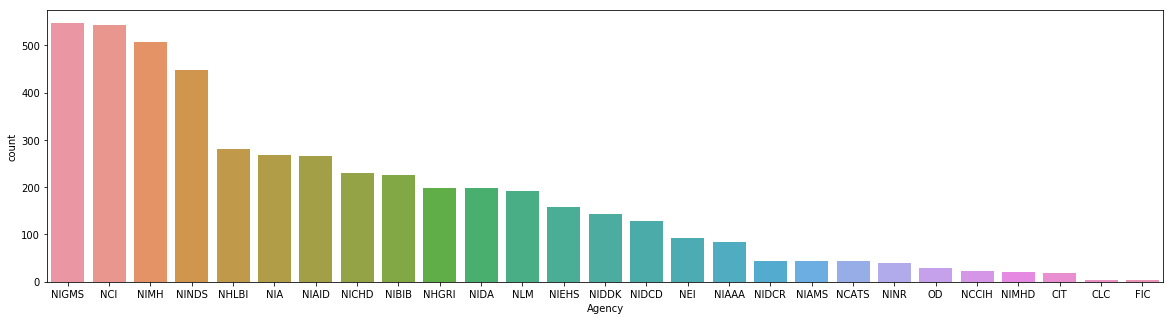

In [279]:
plt.figure(figsize=(20,5))
df_agency = df.groupby(['Agency'])['Project Number'].count()\
                             .reset_index(name='count') \
                             .sort_values(['count'], ascending=False)
sns.barplot(x='Agency', y='count', data=df_agency)

In [280]:
df_agency = df.groupby(['Agency','Fiscal Year'])['Total Cost'].sum()\
                             .reset_index(name='Total Cost') \
                             .sort_values(['Fiscal Year','Agency'], ascending=True)
df_agency['Fiscal Year'] = pd.to_datetime(df_agency['Fiscal Year'],format='%Y')
df_agency['Total Cost'] = df_agency['Total Cost']
df_agency.rename({'Total Cost': 'Total Cost (millon)'}, axis=1, inplace=True)
df_agency[:10]

,Agency,Fiscal Year,Total Cost (millon)
0,CIT,2014-01-01,3414620.0
11,NCATS,2014-01-01,2020212.0
20,NCI,2014-01-01,29324646.0
25,NEI,2014-01-01,10952945.0
30,NHGRI,2014-01-01,19824907.0
35,NHLBI,2014-01-01,18252038.0
40,NIA,2014-01-01,9660211.0
45,NIAAA,2014-01-01,3748263.0
50,NIAID,2014-01-01,14455742.0
55,NIAMS,2014-01-01,1318778.0


In [281]:
df_agency.rename({'Agency': 'name', 'Fiscal Year': 'date', 'Total Cost (millon)': 'value'}, axis=1, inplace=True)
df_agency['category'] = df_agency['name'] 
df_agency.to_csv(path.join(output_path, 'agency_cost_by_year.csv'), index=None)

In [282]:
# The top 10 funded agency
df_year = df.groupby('Fiscal Year')['Project Number'].count()\
                             .reset_index(name='count') \
                             .sort_values(['count'], ascending=False)
df_year[:10]
df_year.to_csv(path.join(output_path, 'project_count_by_FY.csv'), index=None)

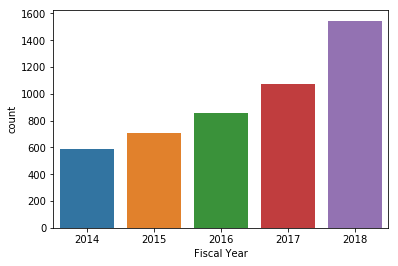

In [283]:
ax = sns.barplot(x='Fiscal Year', y='count', data=df_year)

In [284]:
df_type = df.groupby('Project Type')['Project Number'].count()\
                             .reset_index(name='count') \
                             .sort_values(['count'], ascending=False)
df_type[:10]

,Project Type,count
60,R01,1876
64,R21,284
89,U01,238
95,U54,186
26,K01,153
58,P50,146
55,P30,114
73,R43,102
53,P01,102
74,R44,99


In [285]:
df_type['Project Type'].unique()

array(['R01', 'R21', 'U01', 'U54', 'K01', 'P50', 'P30', 'R43', 'P01',
       'R44', 'K23', 'F31', 'U19', 'F32', 'R00', 'K99', 'U24', 'R03',
       'R25', 'R56', 'F30', 'R35', 'G00', 'T32', 'R41', 'K08', 'K24',
       'H00', 'P41', 'R24', 'K02', 'T00', 'U41', 'K25', 'R33', 'R13',
       'R15', 'P20', 'M01', 'L00', 'R42', 'A00', 'C01', 'D00', 'S10',
       'S00', 'K22', 'R37', 'M00', 'D02', 'M09', 'A20', 'K07', 'M20',
       'T15', 'M11', 'S04', 'R34', 'R90', 'G05', 'T90', 'D01', 'S03',
       'Y00', 'P42', 'K11', 'A23', 'B02', 'F99', 'H11', 'K00', 'K04',
       'M10', 'L04', 'K18', 'M12', 'L14', 'K10', 'S08', 'G20', 'K43',
       'K76', 'R61', 'S02', 'M13', 'U18', 'A22', 'U44', 'C00', 'L06',
       'D08', 'G04', 'G06', 'S16', 'H09', 'I13', 'I00'], dtype=object)

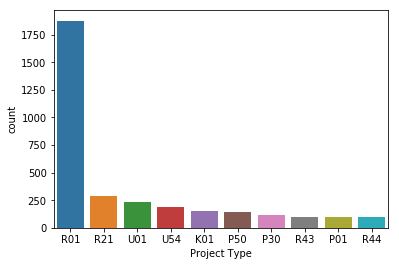

In [286]:
ax = sns.barplot(x='Project Type', y='count', data=df_type[:10])

In [287]:
# The top 10 funded agency
df_univ = df.groupby('Univ')['Project Number'].count()\
                             .reset_index(name='count') \
                             .sort_values(['count'], ascending=False)
df_univ['Univ']= df_univ['Univ'].str.lower()
df_univ[:20]

,Univ,count
207,national institutes of health,206
313,stanford university,196
331,the university of pittsburgh,161
354,university of california san diego,120
423,university of wisconsin madison,119
351,university of california los angeles,116
400,university of pennsylvania,104
384,university of michigan at ann arbor,94
133,harvard university,93
422,university of washington,93


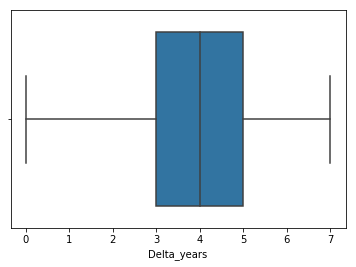

In [288]:
sns.boxplot(df['Delta_years'])

In [289]:
df['Delta_years'].median()

4.0

In [290]:
df['Delta_years'].mean()

3.5942028985507246

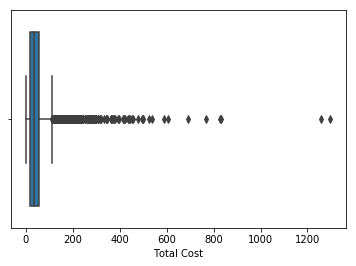

In [291]:
sns.boxplot(df['Total Cost']/10000)

In [292]:
df['Total Cost'].mean()/10000

48.99372218494443

In [293]:
df['Total Cost'].mean()

489937.2218494443